# **Tomato Leaf Disease Detection**

#### **Implemented ResNet**

**Dataset**:- https://www.kaggle.com/datasets/noulam/tomato


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 439 kB 64.5 MB/s 
     |████████████████████████████████| 6.0 MB 55.2 MB/s 
     |████████████████████████████████| 1.7 MB 61.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [10]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!kaggle datasets download -d noulam/tomato

 96% 716M/743M [00:04<00:00, 154MB/s]
100% 743M/743M [00:04<00:00, 162MB/s]


In [14]:
#Data we have received is Zip format so, we have unzip the Dataset

import zipfile
import io
zf = zipfile.ZipFile("/content/tomato.zip", "r")
zf.extractall("/content")
zf.close()

In [15]:
# Importing all the Required Libraries

import tensorflow
from tensorflow import keras 

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Flatten,Dense,Input,Lambda

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Import ResNet
from tensorflow.keras.applications.resnet50 import ResNet50

from glob import glob

In [16]:
#Re-Size the Image
Image_Size = [224,224]

In [17]:
train_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

**Note:-** 
Include_top: This parameter says that "Remove the First and Last Layer , Because we know that my 1st Layer will have 224,224 from the weights itself. Sometimes people wants to put their own Input Image size. Apart from the Last Layer which will definately be Thousand Category but my proplem statement in this case has Four Categories."

In [19]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape= Image_Size + [3], weights= "imagenet",include_top= False)

94765736/94765736 [==============================] - 0s 0us/step


**Note:-** We are using the Existing weights of ImageNet , so we need not Retrain the weights. Only the training should happen in the Last Layer, Not in the Middle Layer.

You don't have to train Resnet Layers because it is already Trained the weights are fixed it is a state of art algorithm.

In [20]:
#Important Don't Train the Existing weights

for layer in resnet50.layers:
  layer.trainable = False

In [21]:
folder = glob("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/*")

In [22]:
folder

['/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/new plant diseases dataset(aug

In [23]:
len(folder)

10

In [25]:
#Our LAyers we can add more if you want

x = Flatten()(resnet50.output)

In [26]:
prediction = Dense(len(folder),activation = "softmax")(x)

In [27]:
#view the structure of the Model
model = Model(inputs = resnet50.input,outputs = prediction)

In [29]:
#view the Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [44]:

# tell the model what cost and optimization method to use
model.compile(
  loss='CategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Data Preprocessing**

In [45]:
# Data Preprocesing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [46]:


#Preprocess the Test size
test_datagen = ImageDataGenerator(rescale = 1./255)

In [47]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [48]:
#Reading Test DataSet
test_set = test_datagen.flow_from_directory("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 4585 images belonging to 10 classes.


In [49]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
  

<ipython-input-49-e70078ff4474>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
574/574 [==============================] - 240s 398ms/step - loss: 2.7510 - accuracy: 0.3188 - val_loss: 1.8015 - val_accuracy: 0.4475
Epoch 2/20
574/574 [==============================] - 230s 400ms/step - loss: 1.8474 - accuracy: 0.4530 - val_loss: 1.3956 - val_accuracy: 0.5926
Epoch 3/20
574/574 [==============================] - 228s 397ms/step - loss: 1.7558 - accuracy: 0.4915 - val_loss: 2.0744 - val_accuracy: 0.4955
Epoch 4/20
574/574 [==============================] - 227s 395ms/step - loss: 1.6709 - accuracy: 0.5192 - val_loss: 2.2102 - val_accuracy: 0.4554
Epoch 5/20
574/574 [==============================] - 228s 397ms/step - loss: 1.5986 - accuracy: 0.5437 - val_loss: 1.6077 - val_accuracy: 0.5603
Epoch 6/20
574/574 [==============================] - 226s 394ms/step - loss: 1.6613 - accuracy: 0.5385 - val_loss: 1.2756 - val_accuracy: 0.6188
Epoch 7/20
574/574 [==============================] - 227s 395ms/step - loss: 1.5401 - accuracy: 0.5690 - val_loss: 3.0591 -

In [51]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


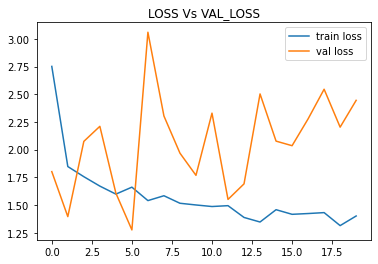

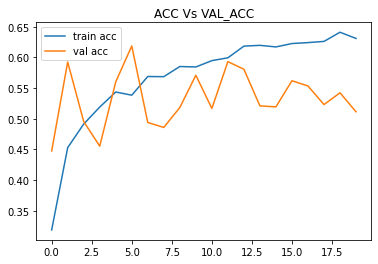

In [55]:
# plot the loss
import matplotlib.pyplot as plt

#plt.figure(figsize = (12,8))
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title("LOSS Vs VAL_LOSS")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
#plt.figure(figsize = (12,8))
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title("ACC Vs VAL_ACC")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

References:-

1. https://keras.io/api/applications/resnet/


2. https://keras.io/api/applications/#usage-examples-for-image-classification-models
